# Use DESI Legacy Survey photo z



In [1]:
import pandas as pd
from astropy.table import Table, Column, vstack
from astropy.cosmology import Planck15
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.io import ascii

import urllib.request, json 

import time
import numpy as np
import pyvo as vo
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'
import matplotlib as mpl
import matplotlib.pyplot as plt

#from selenium import webdriver

from herschelhelp_internal.masterlist import merge_catalogues, nb_merge_dist_plot
from herschelhelp.utils import clean_table

/opt/pyenv/versions/3.7.2/lib/python3.7/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/opt/pyenv/versions/3.7.2/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)
/opt/pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


## 2. Cross match to desi-photoz objects

In [2]:
field = 'AKARI-NEP'

In [3]:
#Open small file containing only id ra dec field photo_z photo_zerr
desi_photoz = Table.read('../../dmu0/dmu0_DESI/data/dr8_red.fits')
desi_photoz = desi_photoz[desi_photoz['field'] == field.ljust(18)]

In [4]:
desi_photoz.write('./data/{}_DESI-DR8_Zou_et_al_2019_photo_z.fits'.format(field), overwrite=True)

In [5]:
desi_photoz

ID,RA,DEC,field,photo_z,photo_zerr
int64,float64,float64,bytes18,float32,float32
8001630400000280,268.12094247218477,64.63815749752216,AKARI-NEP,0.452424,0.097970605
8001630400000281,268.1242491696289,64.63941258019248,AKARI-NEP,0.7877273,0.14048883
8001630400000297,268.22019049307687,64.63925791525955,AKARI-NEP,0.42260316,0.12948428
8001630400000299,268.13356821737136,64.638747199283,AKARI-NEP,0.6142683,0.0576113
8001630400000312,268.1847736754896,64.6393082144058,AKARI-NEP,0.79771537,0.064551294
8001630400000345,268.229081241828,64.64190343952123,AKARI-NEP,0.7401009,0.06612725
8001630400000369,268.1824491474038,64.64438135399607,AKARI-NEP,0.8194652,0.045540713
8001630400000379,268.19888165969104,64.64424702356429,AKARI-NEP,0.54340726,0.077201895
8001630400000380,268.2002907242104,64.64580650852452,AKARI-NEP,0.4762212,0.09194719


In [6]:
ml = Table.read('../../dmu1/dmu1_ml_AKARI-NEP/data/master_catalogue_akari-nep_20180215.fits')['help_id', 'ra', 'dec']

In [7]:
ml

help_id,field,ra,dec,hp_idx,f_ap_gpc1_g,ferr_ap_gpc1_g,m_ap_gpc1_g,merr_ap_gpc1_g,f_gpc1_g,ferr_gpc1_g,m_gpc1_g,merr_gpc1_g,f_ap_gpc1_r,ferr_ap_gpc1_r,m_ap_gpc1_r,merr_ap_gpc1_r,f_gpc1_r,ferr_gpc1_r,m_gpc1_r,merr_gpc1_r,f_ap_gpc1_i,ferr_ap_gpc1_i,m_ap_gpc1_i,merr_ap_gpc1_i,f_gpc1_i,ferr_gpc1_i,m_gpc1_i,merr_gpc1_i,f_ap_gpc1_z,ferr_ap_gpc1_z,m_ap_gpc1_z,merr_ap_gpc1_z,f_gpc1_z,ferr_gpc1_z,m_gpc1_z,merr_gpc1_z,f_ap_gpc1_y,ferr_ap_gpc1_y,m_ap_gpc1_y,merr_ap_gpc1_y,f_gpc1_y,ferr_gpc1_y,m_gpc1_y,merr_gpc1_y,f_ap_irac_i1,ferr_ap_irac_i1,m_ap_irac_i1,merr_ap_irac_i1,f_irac_i1,ferr_irac_i1,m_irac_i1,merr_irac_i1,f_ap_irac_i2,ferr_ap_irac_i2,m_ap_irac_i2,merr_ap_irac_i2,f_irac_i2,ferr_irac_i2,m_irac_i2,merr_irac_i2,f_megacam_u,ferr_megacam_u,m_megacam_u,merr_megacam_u,f_megacam_g,ferr_megacam_g,m_megacam_g,merr_megacam_g,f_megacam_r,ferr_megacam_r,m_megacam_r,merr_megacam_r,f_megacam_i,ferr_megacam_i,m_megacam_i,merr_megacam_i,f_megacam_z,ferr_megacam_z,m_megacam_z,merr_megacam_z,f_wircam_j,ferr_wircam_j,m_wircam_j,merr_wircam_j,f_wircam_ks,ferr_wircam_ks,m_wircam_ks,merr_wircam_ks,f_wircam_y,ferr_wircam_y,m_wircam_y,merr_wircam_y,stellarity,stellarity_origin,flag_cleaned,flag_merged,flag_gaia,flag_optnir_obs,flag_optnir_det,ebv,zspec_association_flag,zspec_qual,zspec
,,deg,deg,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,mag,mag,,,mag,mag,,,mag,mag,,,mag,mag,,,mag,mag,,,mag,mag,,,mag,mag,,,mag,mag,,,,,,,,,,,
bytes27,bytes18,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes20,bool,bool,int64,int64,int64,float64,bool,int64,float64
HELP_J180455.406+665507.589,AKARI-NEP,271.230859611287,66.9187748221774,262856898,191.74336153918216,0.0,18.193199157714844,0.0,217.15013381179716,0.0,18.0580997467041,0.0,3631.4503322371675,0.0,14.999799728393555,0.0,3023.291097407179,0.0,15.198800086975098,0.0,0.7071641953646663,1.1860774502033462,24.276199340820312,1.8210300207138062,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,6.985544874498638,11.174826513998143,21.789499282836914,1.7368600368499756,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NO_INFORMATION,False,False,0,5,1,0.03855692182342835,False,-99,nan
HELP_J180004.970+680357.637,AKARI-NEP,270.020707021287,68.0660103221774,262908863,440347.8993940874,440.4548898180199,9.790510177612305,0.0010860000038519502,179308.1717276721,179.35173786556925,10.765999794006348,0.0010860000038519502,343083.7605487189,0.0,10.06149959564209,0.0,nan,nan,nan,nan,86194.56632481275,197.12072908801284,11.561300277709961,0.002483000047504902,nan,nan,nan,nan,2243014.7942164987,2243.5597749102876,8.022919654846191,0.0010860000038519502,1915119.225265846,1915.584537847272,8.194510459899902,0.0010860000038519502,1284931.5856213951,138135.29919378422,8.627799987792969,0.11672099679708481,1129276.1092352956,90127.93722717132,8.767999649047852,0.08665300160646439,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NO_INFORMATION,False,False,3,1,1,0.049230788528157626,False,-99,nan
HELP_J180249.821+681912.472,AKARI-NEP,270.70758828

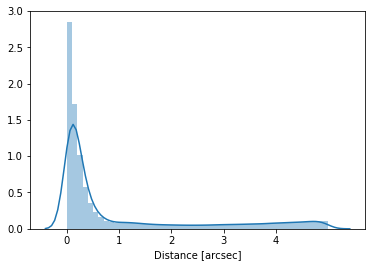

In [8]:
nb_merge_dist_plot(
    SkyCoord(ml['ra'], ml['dec']),
    SkyCoord(desi_photoz['RA']*u.deg, desi_photoz['DEC']*u.deg)
)

In [9]:
# Given the graph above, we use 0.8 arc-second radius
desi_photoz['RA'].name = 'desi_ra'
desi_photoz['DEC'].name = 'desi_dec'
photoz = merge_catalogues(ml, desi_photoz, "desi_ra", "desi_dec", radius=0.8*u.arcsec)

In [10]:
photoz['help_id'].fill_value = ''
photoz['photo_z'].fill_value = np.nan
photoz = photoz.filled()
has_help = photoz['help_id'] != ''
has_z = ~np.isnan(photoz['photo_z'])
photoz[has_help & has_z].write('./data/{}_DESI-DR8_Zou_et_al_2019_photo_z_withhelp_id.fits'.format(field), overwrite=True)

In [11]:
photoz[has_help & has_z]

help_id,field,ra,dec,hp_idx,f_ap_gpc1_g,ferr_ap_gpc1_g,m_ap_gpc1_g,merr_ap_gpc1_g,f_gpc1_g,ferr_gpc1_g,m_gpc1_g,merr_gpc1_g,f_ap_gpc1_r,ferr_ap_gpc1_r,m_ap_gpc1_r,merr_ap_gpc1_r,f_gpc1_r,ferr_gpc1_r,m_gpc1_r,merr_gpc1_r,f_ap_gpc1_i,ferr_ap_gpc1_i,m_ap_gpc1_i,merr_ap_gpc1_i,f_gpc1_i,ferr_gpc1_i,m_gpc1_i,merr_gpc1_i,f_ap_gpc1_z,ferr_ap_gpc1_z,m_ap_gpc1_z,merr_ap_gpc1_z,f_gpc1_z,ferr_gpc1_z,m_gpc1_z,merr_gpc1_z,f_ap_gpc1_y,ferr_ap_gpc1_y,m_ap_gpc1_y,merr_ap_gpc1_y,f_gpc1_y,ferr_gpc1_y,m_gpc1_y,merr_gpc1_y,f_ap_irac_i1,ferr_ap_irac_i1,m_ap_irac_i1,merr_ap_irac_i1,f_irac_i1,ferr_irac_i1,m_irac_i1,merr_irac_i1,f_ap_irac_i2,ferr_ap_irac_i2,m_ap_irac_i2,merr_ap_irac_i2,f_irac_i2,ferr_irac_i2,m_irac_i2,merr_irac_i2,f_megacam_u,ferr_megacam_u,m_megacam_u,merr_megacam_u,f_megacam_g,ferr_megacam_g,m_megacam_g,merr_megacam_g,f_megacam_r,ferr_megacam_r,m_megacam_r,merr_megacam_r,f_megacam_i,ferr_megacam_i,m_megacam_i,merr_megacam_i,f_megacam_z,ferr_megacam_z,m_megacam_z,merr_megacam_z,f_wircam_j,ferr_wircam_j,m_wircam_j,merr_wircam_j,f_wircam_ks,ferr_wircam_ks,m_wircam_ks,merr_wircam_ks,f_wircam_y,ferr_wircam_y,m_wircam_y,merr_wircam_y,stellarity,stellarity_origin,flag_cleaned,flag_merged,flag_gaia,flag_optnir_obs,flag_optnir_det,ebv,zspec_association_flag,zspec_qual,zspec,field_1,ID,field_2,photo_z,photo_zerr
,,deg,deg,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,mag,mag,,,mag,mag,,,mag,mag,,,mag,mag,,,mag,mag,,,mag,mag,,,mag,mag,,,mag,mag,,,,,,,,,,,,,,,,
bytes27,bytes18,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes20,bool,bool,int64,int64,int64,float64,bool,int64,float64,bytes18,int64,bytes18,float32,float32
HELP_J175545.897+663047.894,N/A,268.941237041287,66.51330391217739,190143221,29.35757535665445,0.9354255285250545,20.23069953918457,0.034595001488924026,32.43694067170219,1.4149946132533273,20.122400283813477,0.047363001853227615,77.50322300110273,2.4612181015084453,19.176700592041016,0.03447899967432022,97.58877620153727,2.0397055567015805,18.92650032043457,0.022693000733852386,125.88086449498078,1.462590163040709,18.650100708007812,0.012614999897778034,152.20900190848408,2.256492900768175,18.443899154663086,0.016095999628305435,152.15286024339508,1.561136919916911,18.444299697875977,0.011140000075101852,195.00240966936158,5.437506806375089,18.17490005493164,0.030275000259280205,186.86141052629742,8.573618721985534,18.221200942993164,0.04981600120663643,166.05049452687527,10.882161399743657,18.34939956665039,0.07115399837493896,202.43224,2.77806,18.1343,0.0149,272.49588,3.865061,17.8116,0.0154,182.2215,2.4167836,18.2485,0.0144,244.0058,3.3261173,17.9315,0.0148,11.890499,0.05475777,21.212,0.005,41.342834,0.03807816,19.859,0.001,103.657265,0.095471874,18.861,0.001,160.39845,0.14773245,18.387,0.001,233.77588,0.4306311,17.978,0.002,342.92538,1.263384,17.562,0.004,519.99554,1.9157344,17.11,0.004,268.41086,0.9888622,17.828,0.004,0.03,akari_stellarity,False,False,0,7,7,0.03448041814822801,False,-99,nan,AKARI-NEP,8001634579002394,AKARI-NEP,0.2410184,0.04202972
HELP_J174753.906+655103.031,N/A,266.974610231287,65.8508418421774,190127406,4.719327945616328,0.7664772951273773,22.215299606323242,0.17633700370788574,5.018340786604565,0.614364556750588,22.14859962463379,0.13291999697685242,23.63306503273413,1.061809067567652,20.46619987487793,0.0487810000